# Data Story: Cardiovascular Deaths in the United States

## Motivations and Brief Overview
****
Cardiovascular related health consistently ranks as one of the leading causes of death in the United States. A data set has been constructed containing county-level census data and cardiovascular deaths and death rates over a range of years. This motivates the following question:
***
**If the change in cardiovascular death rate is examined at the county level over a period of years, can any social and/or economic demographic variables be identified that correlate with  this change? If such variables exist and are identified, can they be used as features in a model to predict the change in cardiovascular death rate?**
****

### Importing Libraries and Packages

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Set Seaborn plotting theme.
sns.set();

**Read cardiovascular death rate (cdr) data into a DataFrame**

In [2]:
# Load csv file into DataFrame.
cdr = pd.read_csv('data/cdr_data.csv',index_col=0)
cdr.head()

,NAME,county,state,year,deaths,population,crude_rate,rate_change,CP02_current_058E,CP02_previous_058E,...,CP04_diff_139E,CP04_139SS,CP04_current_140E,CP04_previous_140E,CP04_diff_140E,CP04_140SS,CP04_current_141E,CP04_previous_141E,CP04_diff_141E,CP04_141SS
0,"Calhoun County, Michigan",25,26,2011,441.0,135490.0,325.5,0.0,90930.0,90844.0,...,-0.1,0,47.4,38.2,9.2,0,1126.0,819.0,307.0,0
1,"Clinton County, Michigan",37,26,2011,179.0,75469.0,237.2,0.0,49654.0,48361.0,...,0.7,0,32.8,45.7,-12.9,0,855.0,668.0,187.0,0
2,"Eaton County, Michigan",45,26,2011,291.0,108056.0,269.3,1.0,74278.0,73273.0,...,-2.3,0,39.2,40.9,-1.7,0,790.0,417.0,373.0,0
3,"Genesee County, Michigan",49,26,2011,1400.0,422080.0,331.7,1.0,280301.0,280659.0,...,1.1,0,52.7,55.0,-2.3,0,4706.0,4204.0,502.0,0
4,"Grand Traverse County, Michigan",55,26,2011,229.0,88349.0,259.2,1.0,62370.0,61645.0,...,4.0,0,47.7,50.4,-2.7,0,151.0,706.0,-555.0,1


### Initial Observations:
***
Before doing any complex statistical analysis or visualizations, it is beneficial to observe some simple properties of the data in order to get a better idea of what it's trying to tell us. 

For example, consider the 'deaths' column. This is the unweighted count of cardiovascular related deaths for each row's corresponding county and year. What feature is likely to have the greatest influence on the distribution of this column?

**Expected Trend: Higher Population - Higher Cardiovascular Death Count**

It should be expected for the number of cardiovascular deaths to have a positive correlation to population. Let's verify that this intuition is correct:

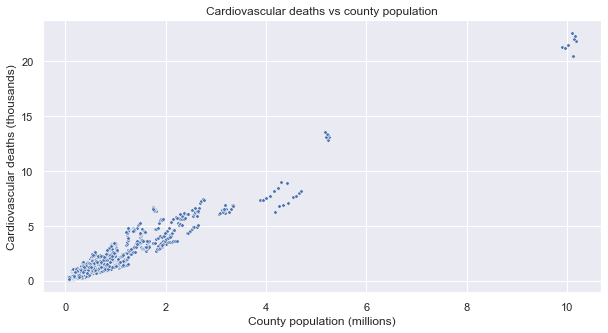

In [3]:
# Plot total cardiovascular deaths against county population.
plt.figure(figsize=(10,5))
sns.scatterplot(x='population',y='deaths',
                data=cdr,marker='.',
                s=50,color='b')
plt.xlabel("County population (millions)")
plt.xticks(ticks=np.arange(0,12*(10**6),2*(10**6)),
           labels=['0','2','4','6','8','10'])
plt.ylabel("Cardiovascular deaths (thousands)")
plt.yticks(ticks=np.arange(0,25000,5000),
           labels=['0','5','10','15','20'])
plt.title("Cardiovascular deaths vs county population")
plt.show()

A county's number of cardiovascular deaths per year roughly scales (by some factor) with its population, and the realtionship appears to be linear. In order to make any meaningful comparisons of cardiovascular deaths between counties with large differences in population, a metric is needed that accounts for population differences. Such a metric is provided by the column 'crude_rate', which is the estimated number of deaths per 100,000 population. Let's examine the distribution of this value.

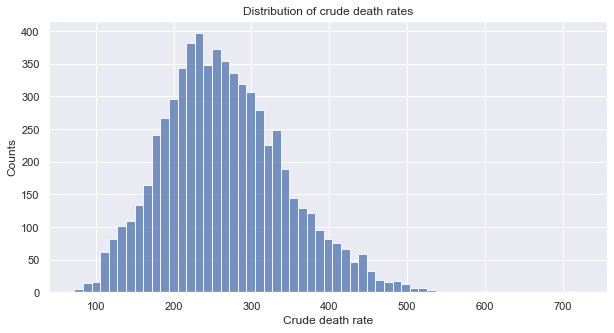

In [4]:
# Create a histogram for the crude death rates.
plt.figure(figsize=(10,5))
sns.histplot(data=cdr,x='crude_rate')
plt.xlabel("Crude death rate")
plt.ylabel("Counts")
plt.title("Distribution of crude death rates")
plt.show()

The distribution of crude death rates appears to be approximately normal, although the right tail is somewhat extended. 
****

# Visualizing Relationships
What are some interesting relationships that can be found in the data, and how can these relationships best be visualized?
****

## Census variables against crude death rate

To begin, let's examine the scatter plots for some of the census variable columns against the crude death rate column.

**Educational attainment**

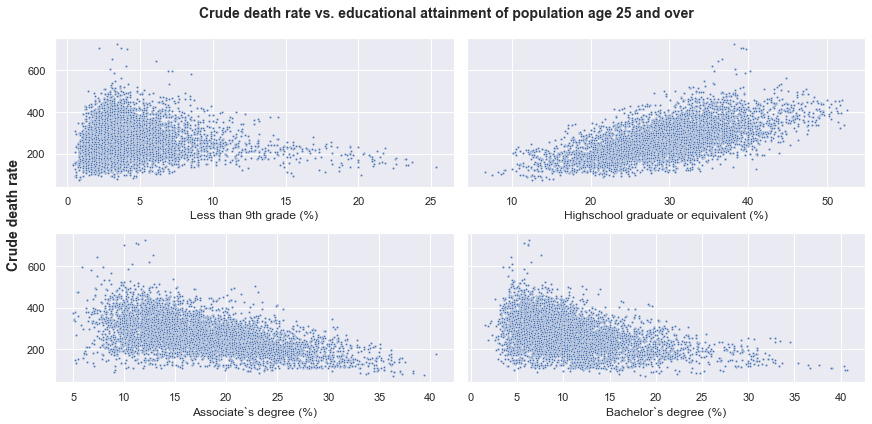

In [5]:
# Select some educational attainment columns.
edu = ['059','061','064','065']
edu = ['CP02_current_'+code+'E' for code in edu]

# Create list of column descriptors
edu_lbls = [
    'Less than 9th grade (%)','Highschool graduate or equivalent (%)',
    'Associate`s degree (%)','Bachelor`s degree (%)'
]

# Make scatterplot for each column against 'crude_rate'
fig, axs = plt.subplots(2,2,sharey=True,
                        figsize=(12,6))

for i,ax in enumerate(list(axs.flatten())):
    sns.scatterplot(x=edu[i],y='crude_rate',
                    marker='.',s=25,color='b',
                    data=cdr,ax=ax)
    ax.set_xlabel(edu_lbls[i])
    ax.set_ylabel('')
    
fig.text(0,.5,'Crude death rate',ha='center',
         va='center',rotation='vertical',
         fontsize=14,fontweight='bold')
fig.suptitle('Crude death rate vs. ' 
             'educational attainment ' 
             'of population age 25 and over',
             fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

**Economic**

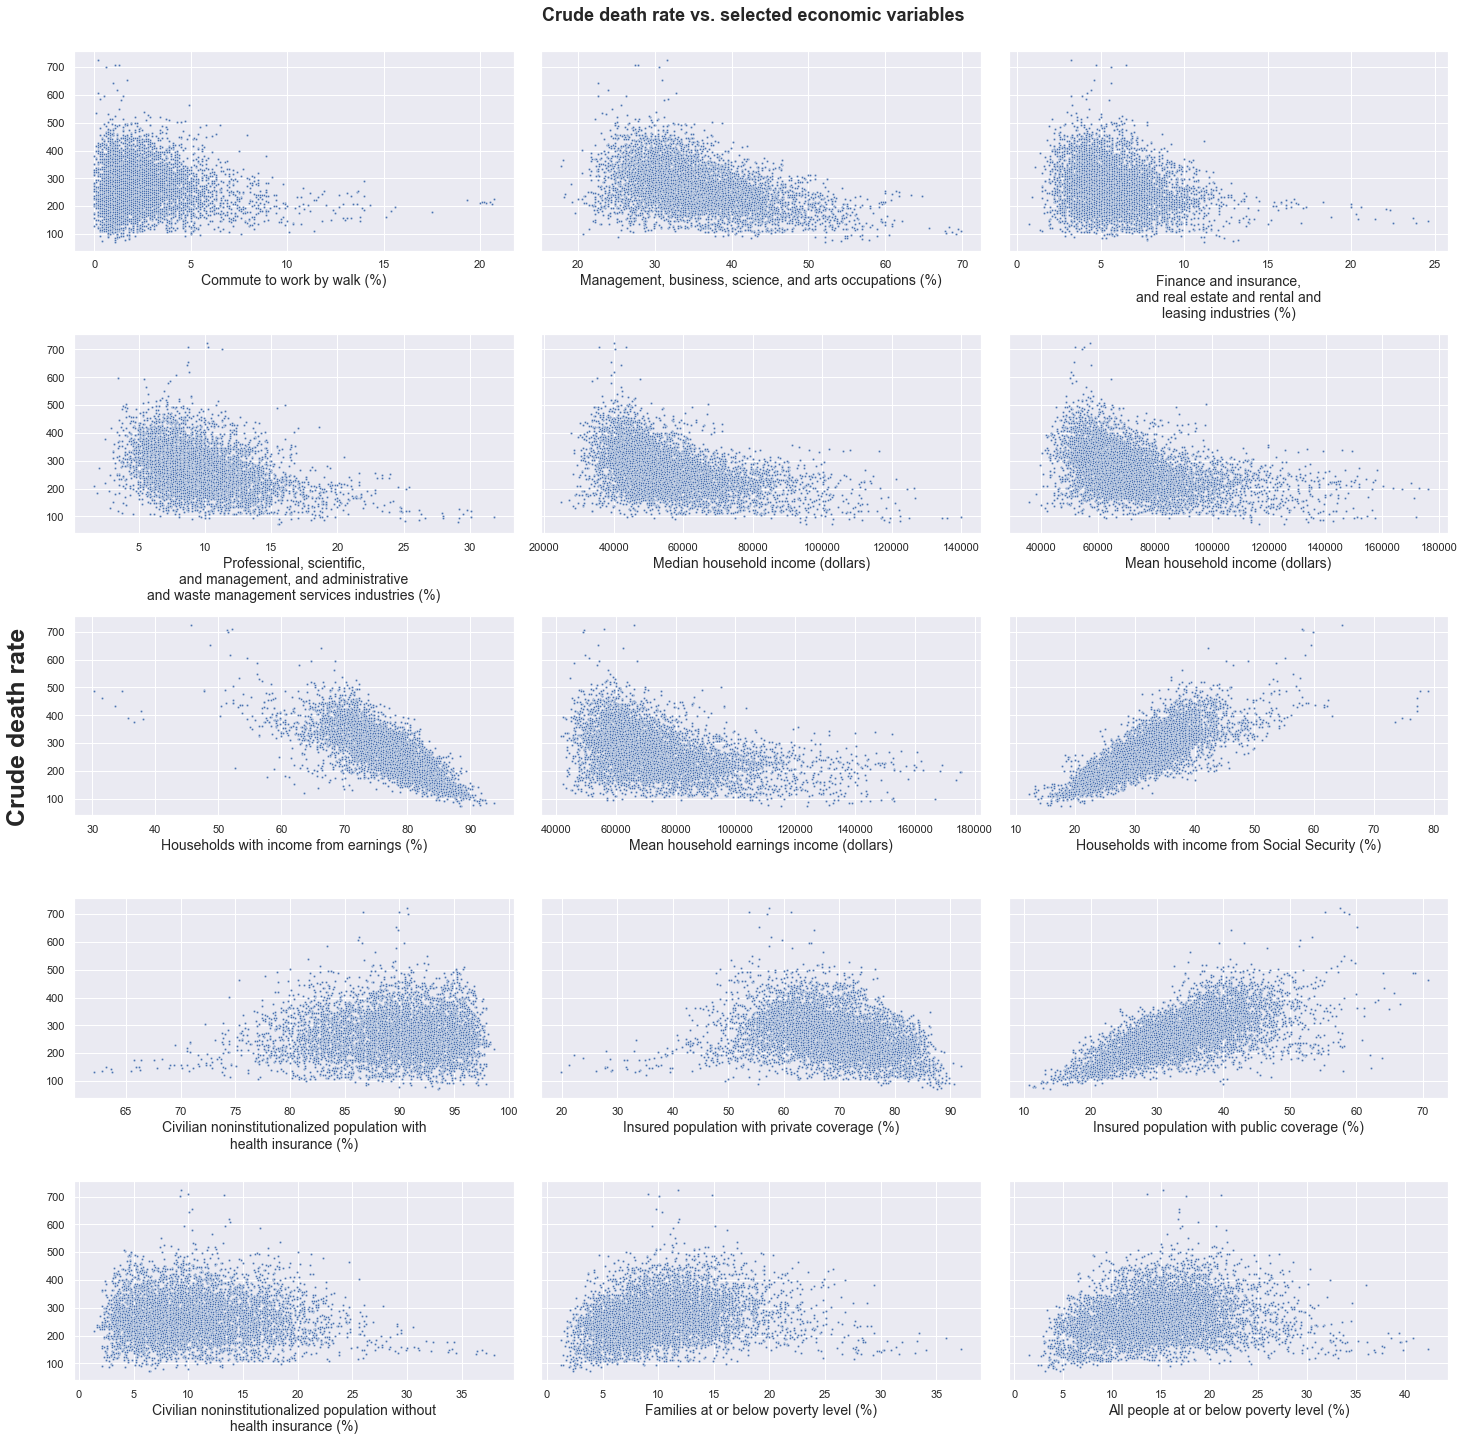

In [6]:
# Select some economic characteristic columns.
eco = [
    '022','027','040','041','062',
    '063','064','065','066','096',
    '097','098','099','119','128'
]
eco = ['CP03_current_'+code+'E' for code in eco]

# Create list of column descriptors
eco_lbls = [
    'Commute to work by walk (%)','Management, business, science, '
    'and arts occupations (%)','Finance and insurance,\n'
    'and real estate and rental and\n''leasing industries (%)',
    'Professional, scientific,\n''and management, and administrative\n'
    'and waste management services industries (%)','Median household income (dollars)',
    'Mean household income (dollars)','Households with income from earnings (%)',
    'Mean household earnings income (dollars)','Households with income from Social Security (%)',
    'Civilian noninstitutionalized population with\n''health insurance (%)',
    'Insured population with private coverage (%)','Insured population with public coverage (%)',
    'Civilian noninstitutionalized population without\n''health insurance (%)',
    'Families at or below poverty level (%)','All people at or below poverty level (%)'
]

# Make scatterplot for each column against 'crude_rate'
fig, axs = plt.subplots(5,3,sharey=True,
                        figsize=(20,20))
for i, ax in enumerate(list(axs.flatten())):
    sns.scatterplot(x=eco[i],y='crude_rate',
                    marker='.',s=25,color='b',
                    data=cdr,ax=ax)
    ax.set_xlabel(eco_lbls[i],fontsize=14)
    ax.set_ylabel('')
    

fig.text(-0.01,.5,'Crude death rate',ha='center',
         va='center',rotation='vertical',
         fontsize=25,fontweight='bold')
fig.suptitle('Crude death rate vs. ' 
             'selected economic variables',
             fontsize=18, fontweight='bold',y=1)
fig.tight_layout(pad=1.1)
plt.show()

Creating scatterplots for the housing variables against crude rate did not reveal any obvious relationships.

***
While these plots certainly suggest some relationships between the census variables and the crude death rate, recall that we are interested in *changes in the rate*. Our data set contains columns for the annual change for each census variable, and also a column recording if the rate has increased or decreased from the previous year. These columns can be used to create the following box plots.

**Changes in educational attainment**

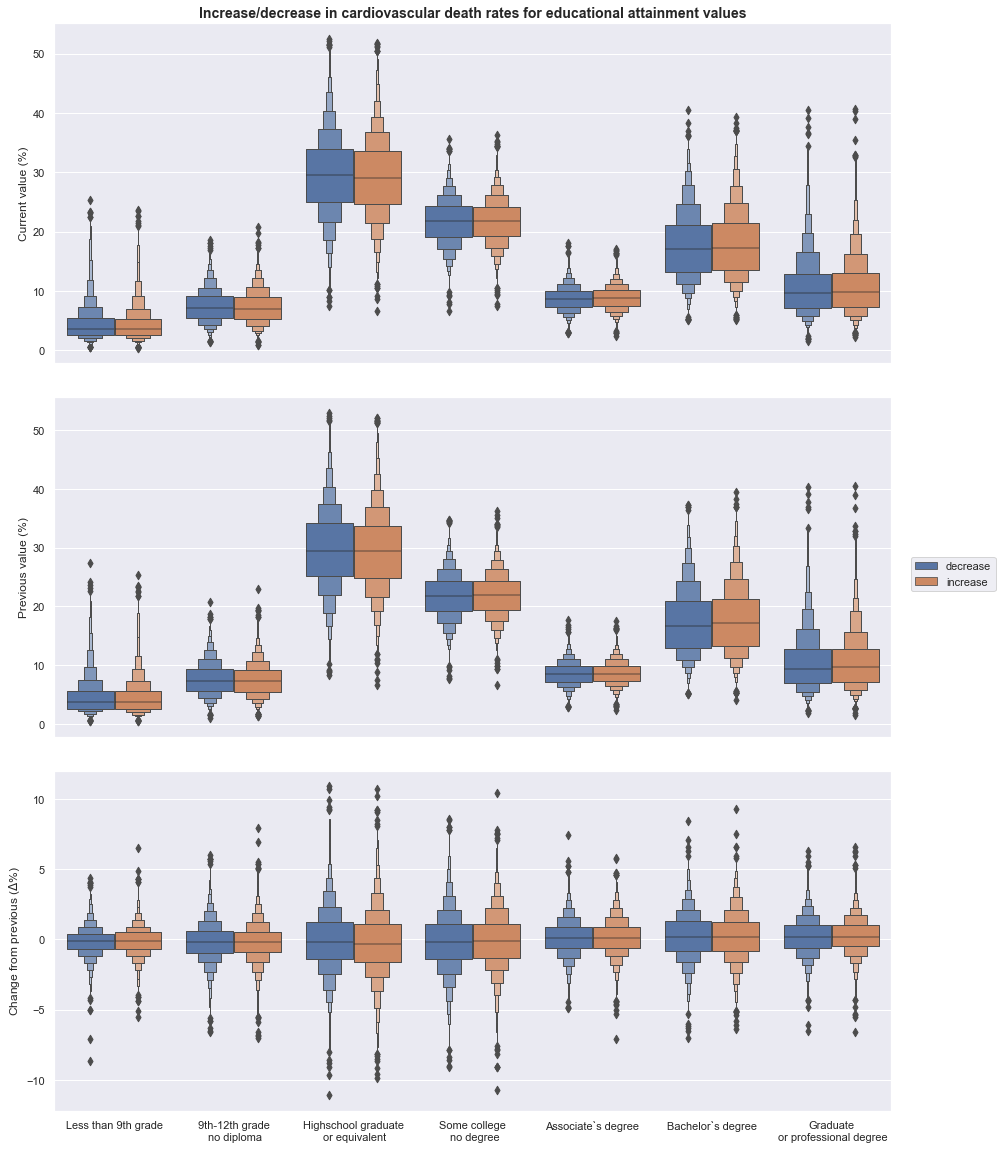

In [7]:
# Full list of social group variable codes.
social = [
    '058','059','060','061',
    '062','063','064','065'
]

# Create list of column name prefixes.
prfxs = ['CP02_current_','CP02_previous_','CP02_diff_']

# Create list of y-axis labels for subplots.
y_labels = ['Current value (%)','Previous value (%)','Change from previous ($\Delta$%)']


# Add additional labels for education variables.
edu_lbls = [
    'Less than 9th grade','9th-12th grade\n no diploma',
    'Highschool graduate\n or equivalent','Some college\n no degree',
    'Associate`s degree','Bachelor`s degree',
    'Graduate\n or professional degree'
]

# Create copy of cdr and map rate change column to strings.
df = cdr.copy()
df['rate_change'] = df.rate_change.map({0:'decrease',1:'increase'})

# Create a 3x1 subplot.
fig, axs = plt.subplots(3,1,figsize=(15,20),
                        sharex=True,gridspec_kw=dict(hspace=0.1))

# Iterate over list of column prefixes.
for i, prfx in enumerate(prfxs):
    # Get list of columns from the codes.
    edu = [prfx+code+'E' for code in social[1:]]
    edu_cols = edu+['rate_change']
    
    # Select the columns and get long-form format. 
    edu_df = df[edu_cols].copy()
    edu_melt = edu_df.melt(id_vars=['rate_change'],value_vars=edu)
    
    # Make boxenplot on current subplot index.
    sns.boxenplot(x='variable',y='value',
                  hue='rate_change',
                  data=edu_melt,ax=axs[i])
    
    # Set y-axis label.
    axs[i].set_ylabel(y_labels[i])
    
    # Clear subplot legend and x-axis labels.
    axs[i].set_xlabel('')
    handles, labels = axs[i].get_legend_handles_labels()
    axs[i].get_legend().remove()
    
# Set x-axis labels on bottom subplot. 
axs[2].set_xticklabels(edu_lbls)

# Set single legend for all subplots.
fig.legend(handles, labels, loc='center right')

# Set the title.
axs[0].set_title('Increase/decrease in cardiovascular death'
                 ' rates for educational attainment values',
                 fontsize=14,fontweight='bold')

# Show the plots.
plt.show()

This plot illustrates a key point that will be investigated in the statistical analysis procedures. Each variable column has their samples partitioned by the change in cardiovascular death rate from the previous year. The horizontal lines denote the mean of the distributions. 

**Can variables be found that have significantly different distributions under this partition? If so, can these variables be used as features to build a classification model?**

These questions can't be definitively answered visually, so we must now move to statistical methods.